# ejercicio 10.2: cadena de desintegración radioactiva

Este ejercicio analiza una versión más avanzada de la simulación de desintegración radiactiva simple en el Ejemplo 10.1.<br>
El isótopo $^{213} Bi$ se descompone a $^{209} Bi$ estable a través de una de dos rutas diferentes, con probabilidades y semi-vidas como se muestra en la figura. (Técnicamente, $^{209} Bi$ no es realmente estable, pero tiene una vida media de más de $10^{19}$ años, mil millones de veces la edad del universo, por lo que bien podría serlo.)<br>

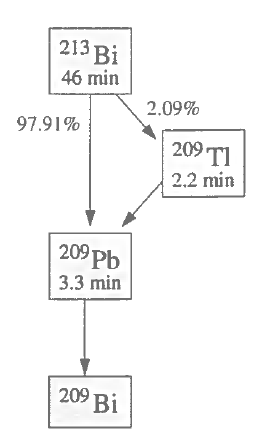

Comenzando con una muestra que consiste en 10.000 átomos de $ ^{213} Bi$, simular la desintegración de los átomos como en el Ejemplo 10.1 dividiendo el tiempo en cortes de longitud $\delta t = 1 s$ cada uno y en cada etapa hacer lo siguiente:<br>

Tenga en cuenta que debe trabajar la cadena desde la parte inferior de esta manera, no desde la parte superior, para evitar que el mismo átomo se desintegre inadvertidamente dos veces en un solo paso. Lleve un registro del número de átomos de cada uno de los cuatro isótopos en todo momento durante 20000 segundos y haga un solo gráfico que muestre los cuatro números en función del tiempo en los mismos ejes.

a) Para cada átomo de $^{209} Pb$ a su vez, decida al azar, con la probabilidad apropiada, si se descompone o no. (La probabilidad se puede calcular a partir de la Ec. (10.3)) Contar el número total de desintegraciones, restarlo del número de átomos de $^{209} Pb$ y sumarlo al número de atomos de $^{209} Bi$.

In [1]:
using Plots

In [9]:
# cosntantes
h=1.0
τPbBi=3.3*60
τTlPb=2.2*60
τBiTl=46*60
τBiPb=46*60
function probabilidad(τ,h)
    p=1-2^(-h/τ)
    return(p)
end
pBiPb=probabilidad(τBiPb,h)
pBiTl=probabilidad(τBiTl,h)
pTlPb=probabilidad(τTlPb,h)
pPbBi=probabilidad(τPbBi,h)
tmax=20000

20000

In [10]:
NT213Bi=10000
NT209Tl=0
NT209Pb=0
NT209Bi=0
tpuntos=0.0:h:tmax
Bi213puntos=Array{Int64}(undef,0)
Pbpuntos=Array{Int64}(undef,0)
Tlpuntos=Array{Int64}(undef,0)
Bi209puntos=Array{Int64}(undef,0)
@time for t in tpuntos
    push!(Bi213puntos,NT213Bi)
    push!(Tlpuntos,NT209Tl)
    push!(Pbpuntos,NT209Pb)
    push!(Bi209puntos,NT209Bi)
    decaimica1=0
    decaimica2=0
    decaimica3=0
    decaimica4=0
    numetl=0
    for i in (0:NT209Pb)
        if rand()<pPbBi
            decaimica1+=1
        end
    end
    
    for i in (0:NT209Tl)
        if rand()<pTlPb
            decaimica2+=1
        end
    end
    
    for i in (0:NT213Bi)
        if rand()<pBiPb
            decaimica3+=1
            if rand()<0.9791
                decaimica4+=1
            else
                numetl+=1
            end
        end
    end
    NT213Bi-=decaimica3
    NT209Tl+=numetl-decaimica2
    NT209Pb+=decaimica4+decaimica2-decaimica1
    NT209Bi+=decaimica1
end

  6.696168 seconds (145.67 M allocations: 2.793 GiB, 6.13% gc time)


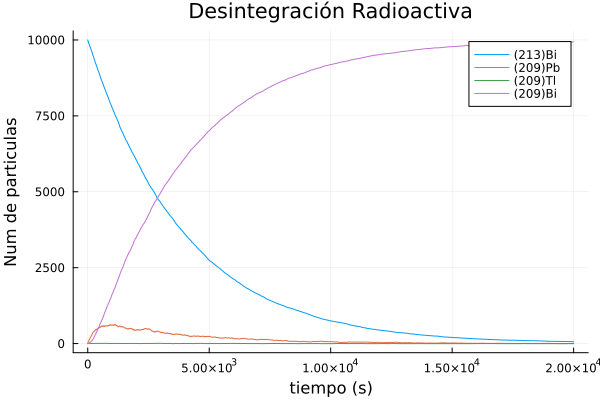

In [12]:
plot(tpuntos,Bi213puntos,label="(213)Bi")
plot!(tpuntos,Pbpuntos,label="(209)Pb")
plot!(tpuntos,Tlpuntos,label="(209)Tl")
plot!(tpuntos,Bi209puntos,label="(209)Bi")
title!("Desintegración Radioactiva")
xlabel!("tiempo (s)")
ylabel!("Num de particulas")